In [ ]:
import pandas as pd

# Upload file
from google.colab import files
uploaded = files.upload()

# Read Excel file
df = pd.read_excel("term deposit.xlsx")
df.head()

Saving term deposit.xlsx to term deposit (3).xlsx


,Age,Job,Marital,Education,Default,Balance,Housing,Loan,Contact,Day,Month,Duration,No of times contacted during the Campaign,Pdays,Previous,Poutcome,Y
0,30,Unemployed,Married,Primary,No,1787,No,No,Cellular,19,Oct,79,1,-1,0,Unknown,No
1,33,Services,Married,Secondary,No,4789,Yes,Yes,Cellular,11,May,220,1,339,4,Failure,No
2,35,Management,Single,Tertiary,No,1350,Yes,No,Cellular,16,Apr,185,1,330,1,Failure,No
3,30,Management,Married,Tertiary,No,1476,Yes,Yes,Unknown,3,Jun,199,4,-1,0,Unknown,No
4,59,Blue-Collar,Married,Secondary,No,0,Yes,No,Unknown,5,May,226,1,-1,0,Unknown,No


In [ ]:
print("Rows and Columns:", df.shape)

Rows and Columns: (4521, 17)


In [ ]:
df.describe()

,Age,Balance,Day,Duration,No of times contacted during the Campaign,Pdays,Previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [ ]:
print("Missing Values:")
df.isnull().sum()

Missing Values:


,0
Age,0
Job,0
Marital,0
Education,0
Default,0
Balance,0
Housing,0
Loan,0
Contact,0
Day,0


In [ ]:
df.duplicated().sum()

np.int64(0)

No missing values and duplicate values


In [ ]:
df['Job'].unique()
df['Job'].value_counts()


,count
Job,
Management,969
Blue-Collar,946
Technician,768
Admin.,478
Services,417
Retired,230
Self-Employed,183
Entrepreneur,168
Unemployed,128


In [ ]:
df['Education'].unique()
df['Education'].value_counts()

,count
Education,
Secondary,2306
Tertiary,1350
Primary,678
Unknown,187


In [ ]:
# Identify Numerical Columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
# # check no. of unique values
for col in num_cols:
    print(f"{col}: {df[col].nunique()} unique values")

Age: 67 unique values
Balance: 2353 unique values
Day: 31 unique values
Duration: 875 unique values
No of times contacted during the Campaign: 32 unique values
Pdays: 292 unique values
Previous: 24 unique values


In [ ]:
# Identify Categorical Columns
# check unique values
cat_cols = df.select_dtypes(include='object').columns
for col in cat_cols:
    print(f"{col}: {df[col].unique()}")
    print()

Job: ['Unemployed' 'Services' 'Management' 'Blue-Collar' 'Self-Employed'
 'Technician' 'Entrepreneur' 'Admin.' 'Student' 'Housemaid' 'Retired'
 'Unknown']

Marital: ['Married' 'Single' 'Divorced']

Education: ['Primary' 'Secondary' 'Tertiary' 'Unknown']

Default: ['No' 'Yes']

Housing: ['No' 'Yes']

Loan: ['No' 'Yes']

Contact: ['Cellular' 'Unknown' 'Telephone']

Month: ['Oct' 'May' 'Apr' 'Jun' 'Feb' 'Aug' 'Jan' 'Jul' 'Nov' 'Sep' 'Mar' 'Dec']

Poutcome: ['Unknown' 'Failure' 'Other' 'Success']

Y: ['No' 'Yes']



In [ ]:
# Use this to observe top or bottom values of the data columns to
# further understand my reasons for the actions above.

column_name = 'Previous'
numbers_to_return = 3
top_bottom = 2 # specify 1 for ascending order sort and 2 for descending order.. Defaults to Ascending.
df.sort_values(by = column_name, ascending = True if top_bottom == 1 else False if top_bottom == 2 else 1).head(numbers_to_return)

,Age,Job,Marital,Education,Default,Balance,Housing,Loan,Contact,Day,Month,Duration,No of times contacted during the Campaign,Pdays,Previous,Poutcome,Y
4397,35,Blue-Collar,Married,Secondary,No,305,Yes,No,Cellular,18,May,7,7,367,25,Failure,No
3426,40,Self-Employed,Married,Primary,No,2077,Yes,No,Cellular,13,May,363,1,173,24,Other,No
4080,40,Blue-Collar,Married,Primary,No,2805,Yes,No,Cellular,14,May,173,6,353,23,Failure,No


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure seaborn is properly imported
# (Avoid NameError: name 'sns' is not defined) :contentReference[oaicite:2]{index=2}

# Print column info for debugging
print("All columns:", df.columns.tolist())
obj_cols = df.select_dtypes(include=['object']).columns
print("Object-type columns:", obj_cols.tolist())
df = df.rename(columns={'Y': 'y'})

# Safely drop 'y' if present
categorical_columns = obj_cols.drop('y', errors='ignore')
print("Categorical columns used for plotting:", categorical_columns.tolist())

# Ensure 'y' is a valid column before plotting
if 'y' not in df.columns:
    raise KeyError("Target column 'y' is missing from the DataFrame. Check your preprocessing.")

All columns: ['Age', 'Job', 'Marital', 'Education', 'Default', 'Balance', 'Housing', 'Loan', 'Contact', 'Day', 'Month', 'Duration', 'No of times contacted during the Campaign', 'Pdays', 'Previous', 'Poutcome', 'Y']
Object-type columns: ['Job', 'Marital', 'Education', 'Default', 'Housing', 'Loan', 'Contact', 'Month', 'Poutcome', 'Y']
Categorical columns used for plotting: ['Job', 'Marital', 'Education', 'Default', 'Housing', 'Loan', 'Contact', 'Month', 'Poutcome', 'Y']


In [ ]:
df.get('y')
#df = df.drop('y', axis=1, errors='ignore')

,y
0,No
1,No
2,No
3,No
4,No
...,...
4516,No
4517,No
4518,No
4519,No


In [ ]:
df = df.rename(columns={'Month': 'month', 'Education': 'education'}, inplace=False)

In [ ]:
from sklearn.preprocessing import LabelEncoder

def preprocess_data(df, target_col='y'):
    label_encoders = {}

    # Normalize all column names
    df.columns = df.columns.str.strip()

    # Rename Month and Education (if they exist)
    df = df.rename(columns={'Month': 'month', 'Education': 'education'}, inplace=False)

    # Continue with the rest of your logic...
    categorical_columns = df.select_dtypes(include=['object']).columns.drop(target_col, errors='ignore')
    non_ordinal = categorical_columns.drop(['education', 'month'], errors='ignore')

    if target_col not in df.columns:
        print(f"Warning: target column '{target_col}' not found in dataframe.")
        return df, label_encoders

    for col in non_ordinal:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col].astype(str).fillna(''))
        label_encoders[col] = le

    # Ordinal mappings ...
    month_order = { 'jan':1, 'feb':2, 'mar':3, 'apr':4, 'may':5, 'jun':6,
                    'jul':7, 'aug':8, 'sep':9, 'oct':10, 'nov':11, 'dec':12}
    education_mapping = {'primary':0, 'secondary':1, 'tertiary':2, 'unknown':-1}

    if 'month' in df.columns:
        df['month'] = df['month'].map(month_order).fillna(-1).astype(int)
    if 'education' in df.columns:
        df['education'] = df['education'].map(education_mapping).fillna(-1).astype(int)

    df[target_col] = df[target_col].apply(lambda x: 1 if str(x).lower() == 'yes' else 0)

    return df, label_encoders


In [ ]:
df, label_encoders = preprocess_data(df)
print("Post-processing columns:", df.columns.tolist())

Post-processing columns: ['Age', 'Job', 'Marital', 'education', 'Default', 'Balance', 'Housing', 'Loan', 'Contact', 'Day', 'month', 'Duration', 'No of times contacted during the Campaign', 'Pdays', 'Previous', 'Poutcome', 'y']


In [ ]:
df.describe()

,Age,Job,Marital,education,Default,Balance,Housing,Loan,Contact,Day,month,Duration,No of times contacted during the Campaign,Pdays,Previous,Poutcome,y
count,4521.000000,4521.000000,4521.000000,4521.0,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.0,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,4.411192,1.147755,-1.0,0.016810,1422.657819,0.566025,0.152842,0.652289,15.915284,-1.0,263.961292,2.793630,39.766645,0.542579,2.559168,0.115240
std,10.576211,3.255716,0.599650,0.0,0.128575,3009.638142,0.495676,0.359875,0.901498,8.247667,0.0,259.856633,3.109807,100.121124,1.693562,0.992051,0.319347
min,19.000000,0.000000,0.000000,-1.0,0.000000,-3313.000000,0.000000,0.000000,0.000000,1.000000,-1.0,4.000000,1.000000,-1.000000,0.000000,0.000000,0.000000
25%,33.000000,1.000000,1.000000,-1.0,0.000000,69.000000,0.000000,0.000000,0.000000,9.000000,-1.0,104.000000,1.000000,-1.000000,0.000000,3.000000,0.000000
50%,39.000000,4.000000,1.000000,-1.0,0.000000,444.000000,1.000000,0.000000,0.000000,16.000000,-1.0,185.000000,2.000000,-1.000000,0.000000,3.000000,0.000000
75%,49.000000,7.000000,2.000000,-1.0,0.000000,1480.000000,1.000000,0.000000,2.000000,21.000000,-1.0,329.000000,3.000000,-1.000000,0.000000,3.000000,0.000000
max,87.000000,11.000000,2.000000,-1.0,1.000000,71188.000000,1.000000,1.000000,2.000000,31.000000,-1.0,3025.000000,50.000000,871.000000,25.000000,3.000000,1.000000


In [ ]:
print("All columns:", df.columns.tolist())
print("Object-type columns:", obj_cols.tolist())

All columns: ['Age', 'Job', 'Marital', 'education', 'Default', 'Balance', 'Housing', 'Loan', 'Contact', 'Day', 'month', 'Duration', 'No of times contacted during the Campaign', 'Pdays', 'Previous', 'Poutcome', 'y']
Object-type columns: ['Job', 'Marital', 'Education', 'Default', 'Housing', 'Loan', 'Contact', 'Month', 'Poutcome', 'Y']


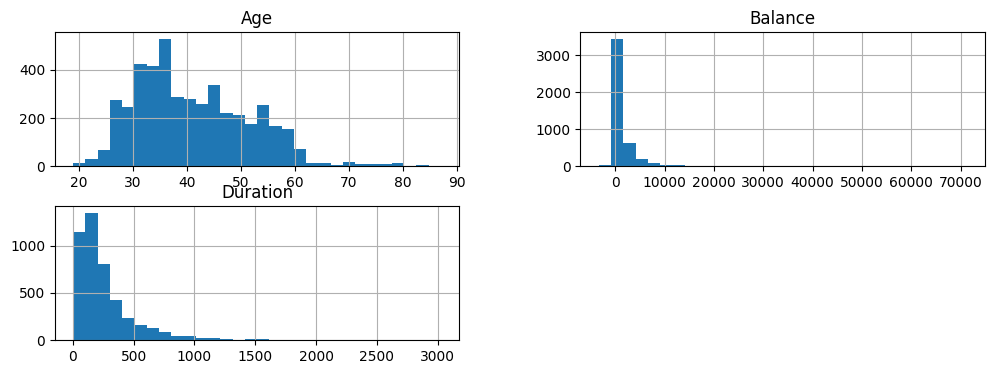

In [ ]:
df[['Age','Balance','Duration']].hist(figsize=(12,4), bins=30)
plt.show()

In [ ]:
from google.colab import files
uploaded = files.upload()

# Read Excel file
df = pd.read_excel("term deposit.xlsx")
df.head()

Saving term deposit.xlsx to term deposit (4).xlsx


,Age,Job,Marital,Education,Default,Balance,Housing,Loan,Contact,Day,Month,Duration,No of times contacted during the Campaign,Pdays,Previous,Poutcome,Y
0,30,Unemployed,Married,Primary,No,1787,No,No,Cellular,19,Oct,79,1,-1,0,Unknown,No
1,33,Services,Married,Secondary,No,4789,Yes,Yes,Cellular,11,May,220,1,339,4,Failure,No
2,35,Management,Single,Tertiary,No,1350,Yes,No,Cellular,16,Apr,185,1,330,1,Failure,No
3,30,Management,Married,Tertiary,No,1476,Yes,Yes,Unknown,3,Jun,199,4,-1,0,Unknown,No
4,59,Blue-Collar,Married,Secondary,No,0,Yes,No,Unknown,5,May,226,1,-1,0,Unknown,No


In [ ]:
df.columns = df.columns.str.strip().str.lower()

Normalized columns: ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'no of times contacted during the campaign', 'pdays', 'previous', 'poutcome', 'y']


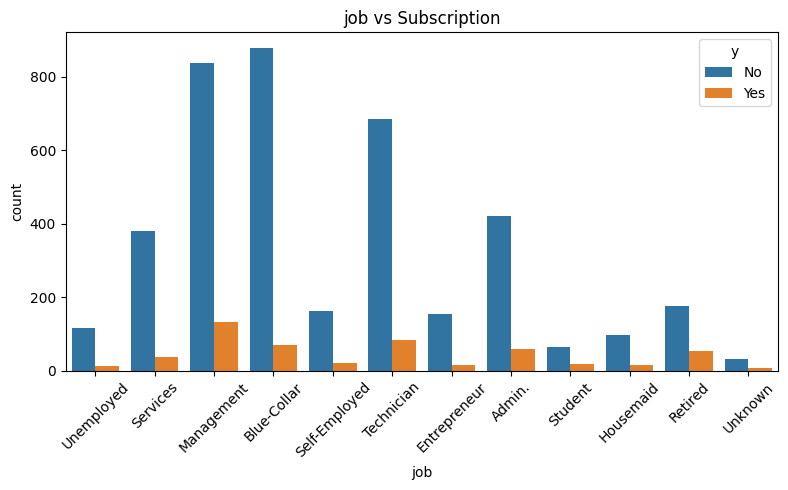

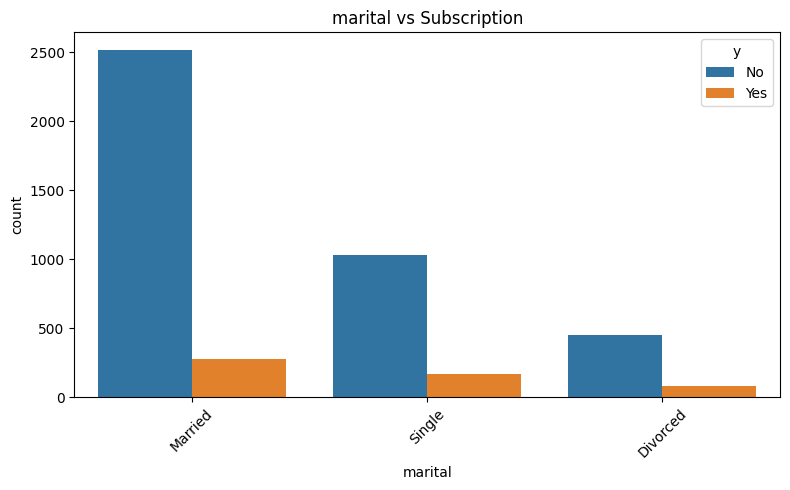

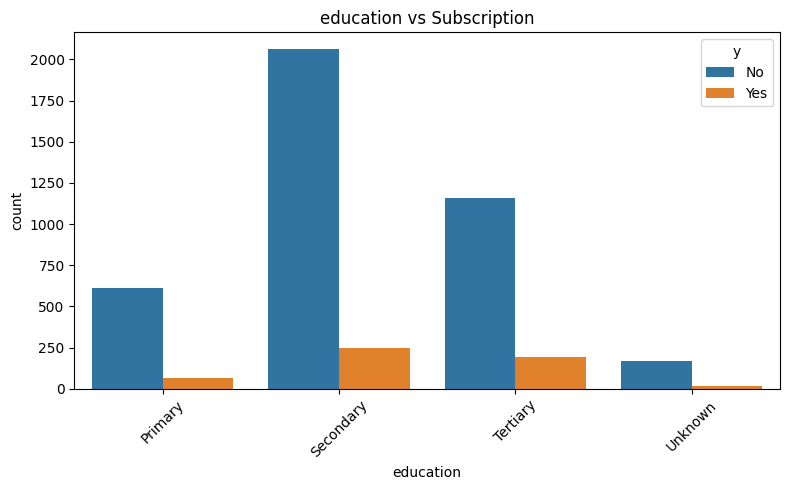

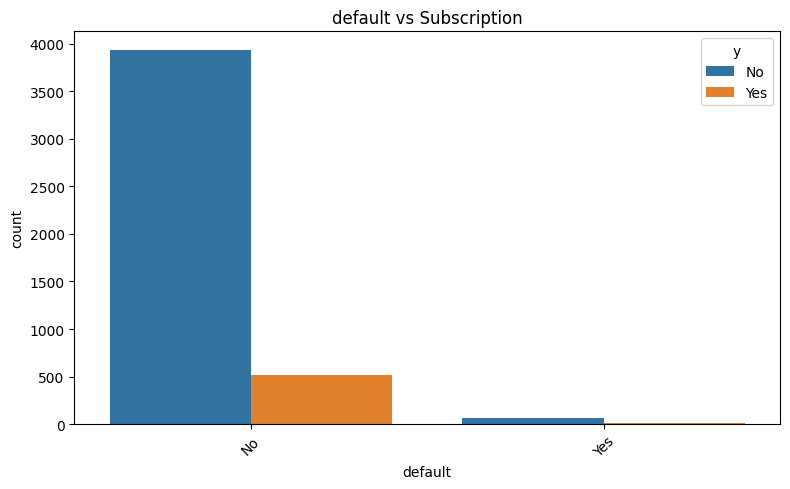

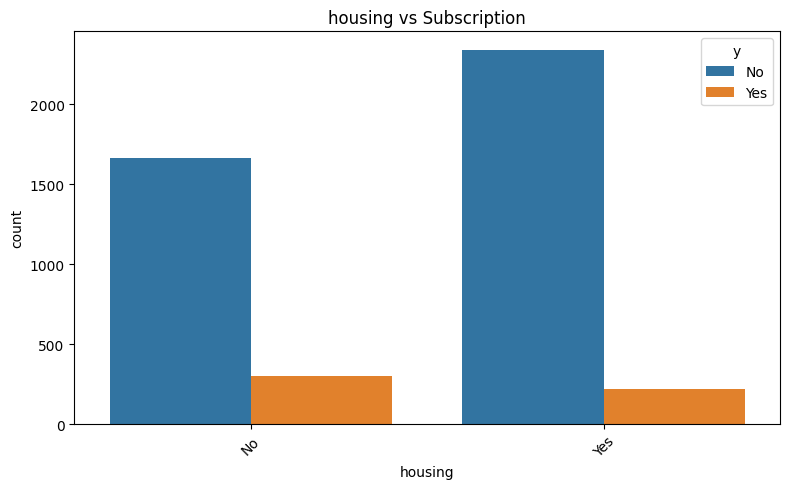

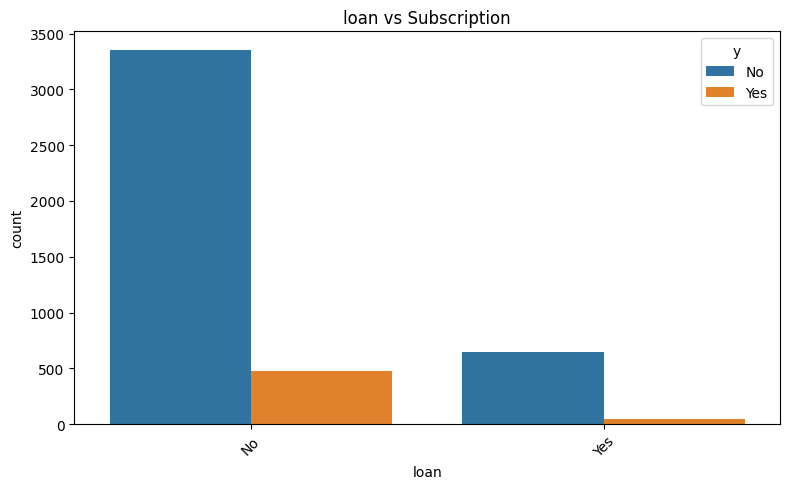

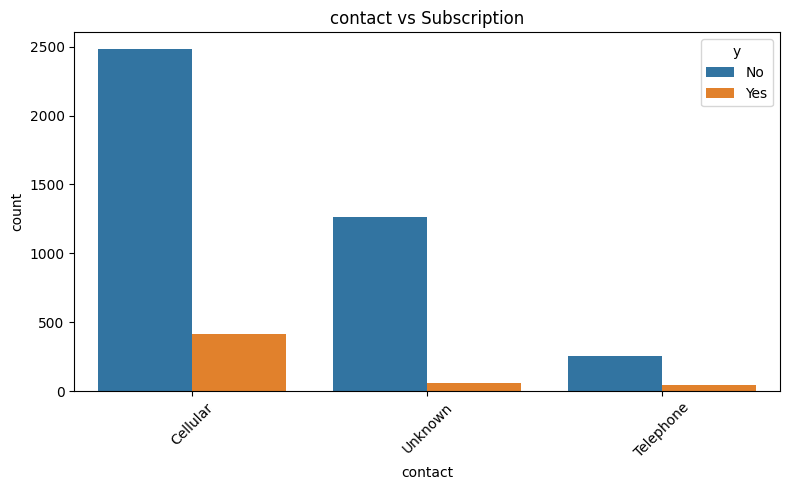

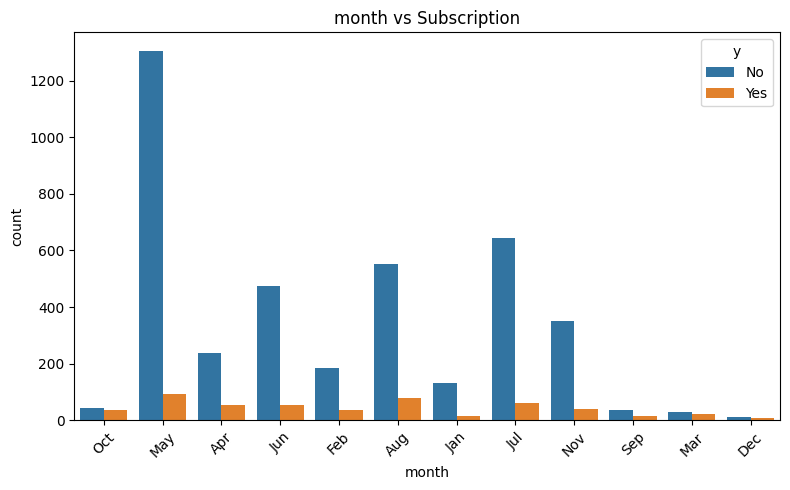

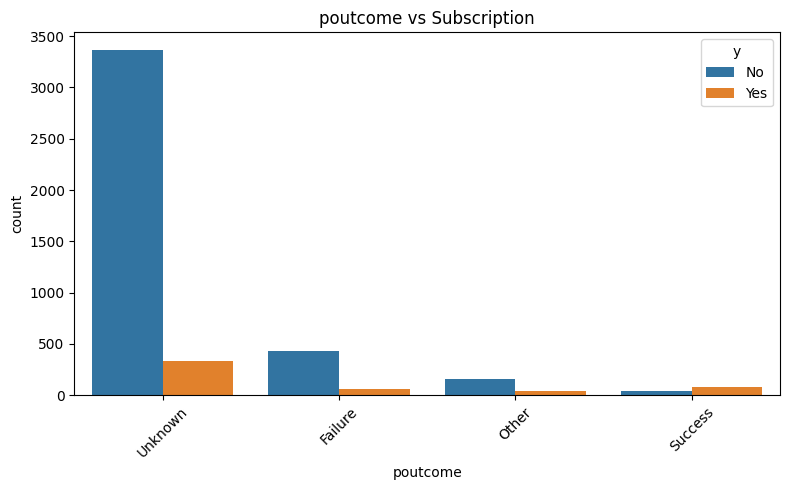

In [ ]:
df.columns = df.columns.str.strip().str.lower()

print("Normalized columns:", df.columns.tolist())

# Now your target column is 'y'
obj_cols = df.select_dtypes(include=['object']).columns
category_columns = obj_cols.drop('y', errors='ignore')

# Plot
for col in category_columns:
    plt.figure(figsize=(8,5))
    sns.countplot(data=df, x=col, hue='y')
    plt.title(f'{col} vs Subscription')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [ ]:
print("DataFrame columns:", df.columns.tolist())
print("Object-type columns:", obj_cols.tolist())
print("Category columns (to plot):", category_columns.tolist())

DataFrame columns: ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'no of times contacted during the campaign', 'pdays', 'previous', 'poutcome', 'y']
Object-type columns: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']
Category columns (to plot): ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']


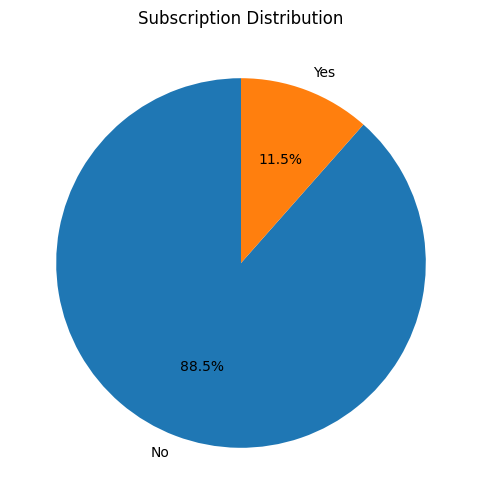

In [ ]:
df['y'].value_counts().plot(
    kind='pie', autopct='%1.1f%%', startangle=90, figsize=(6,6), labels=['No','Yes'])
plt.title("Subscription Distribution")
plt.ylabel("")
plt.show()

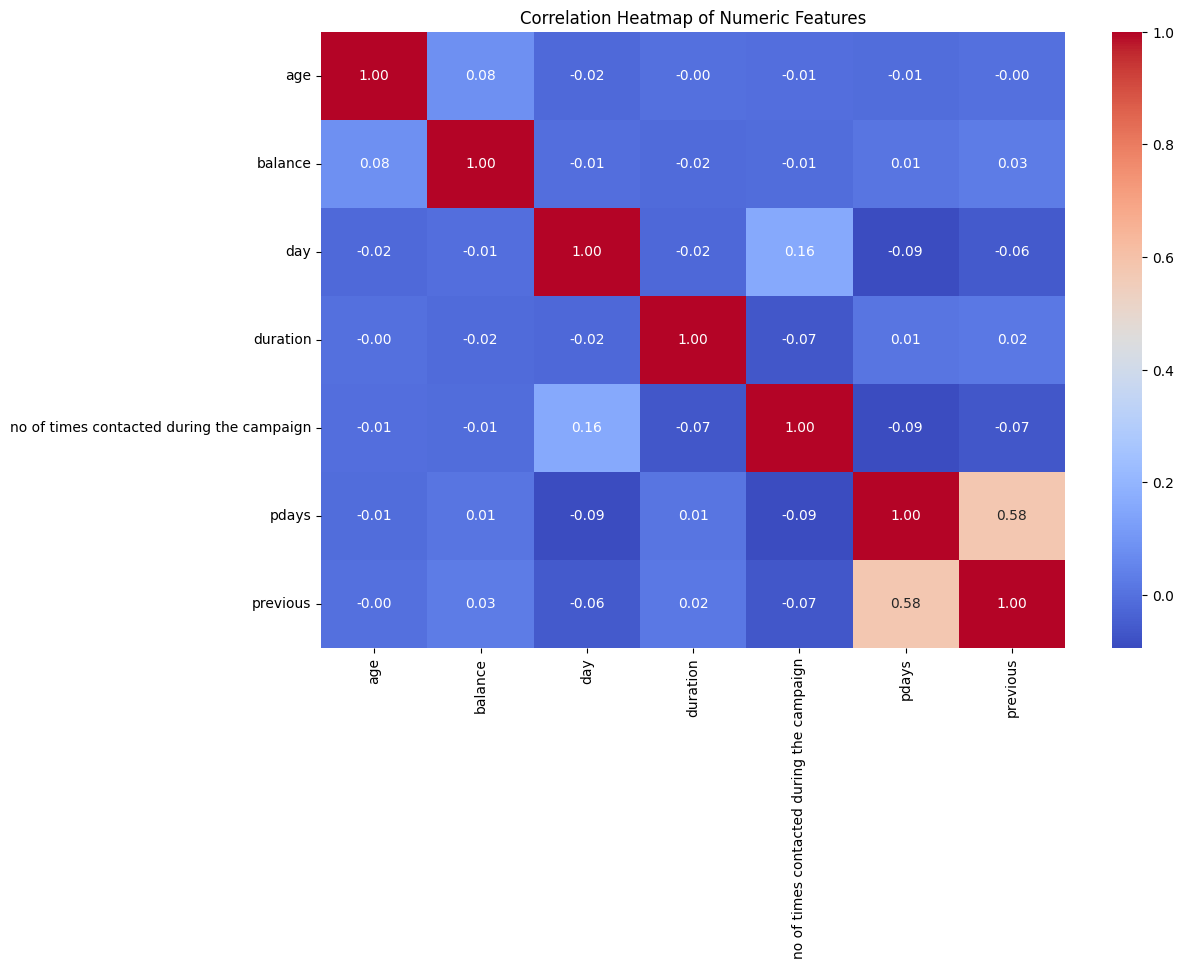

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

/tmp/ipython-input-2985514162.py:6: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  mask = corr.applymap(lambda x: np.nan if abs(x) < threshold else x)


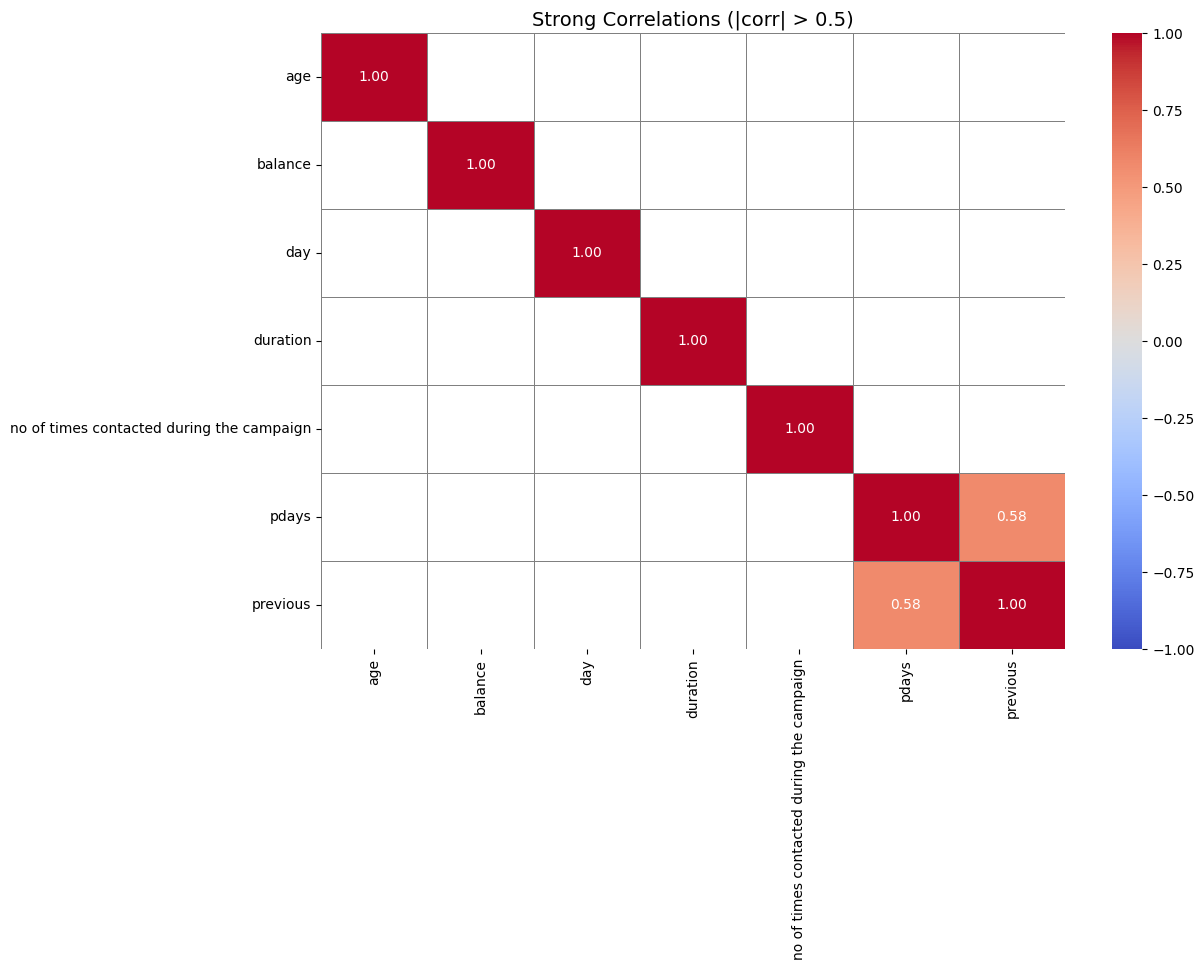

In [ ]:
import numpy as np
corr = df.select_dtypes(include=['number']).corr()

# Mask weak correlations (keep only |corr| > 0.5)
threshold = 0.5
mask = corr.applymap(lambda x: np.nan if abs(x) < threshold else x)

# Plot heatmap
plt.figure(figsize=(12,8))
sns.heatmap(mask, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1,
            linewidths=0.5, linecolor='gray', cbar=True)

plt.title(f"Strong Correlations (|corr| > {threshold})", fontsize=14)
plt.show()

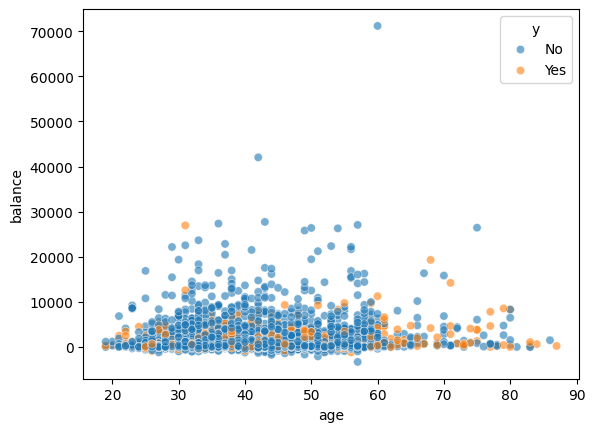

In [ ]:
sns.scatterplot(data=df, x='age', y='balance', hue='y', alpha=0.6)
plt.show()

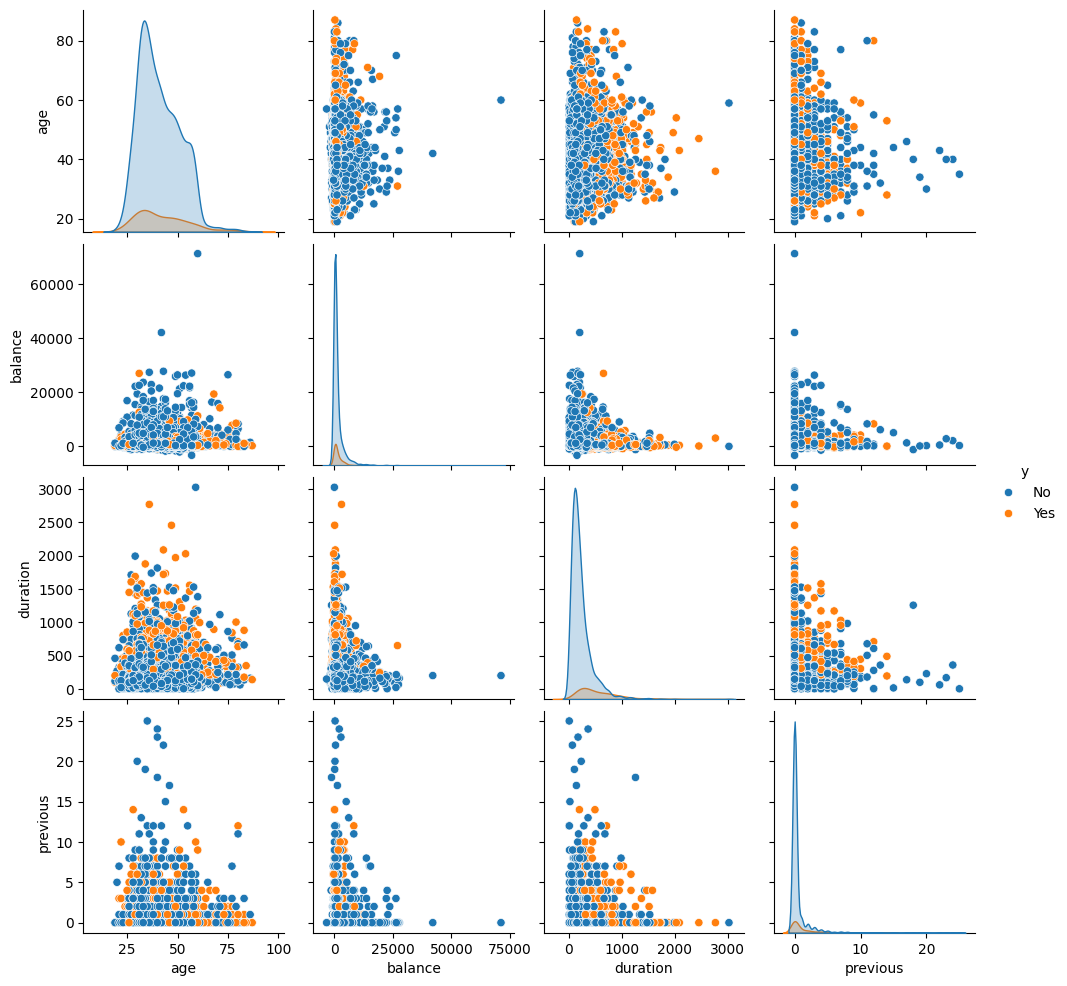

In [ ]:
sns.pairplot(df[['age', 'balance', 'duration', 'previous', 'y']], hue='y')
plt.show()

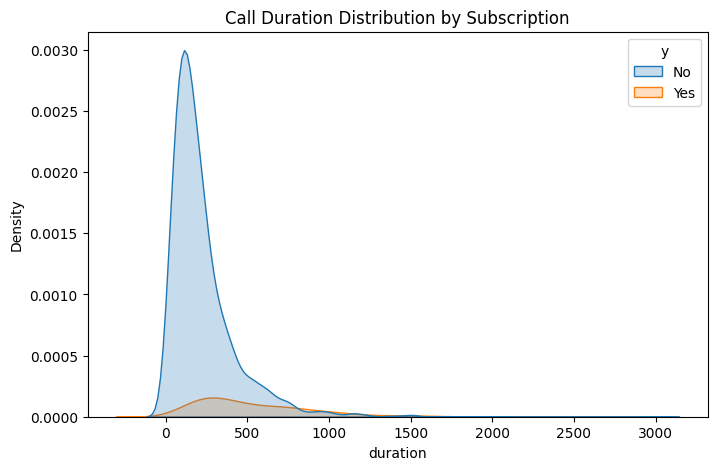

In [ ]:
plt.figure(figsize=(8,5))
sns.kdeplot(data=df, x="duration", hue="y", fill=True)
plt.title("Call Duration Distribution by Subscription")
plt.show()